In [1]:
import pandas as pd
import numpy as np
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from visualize_placement import visualize_placement
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator

## Load necessary data

In [2]:
G = pickle.load(open('data/revised_cleaning_results/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/revised_cleaning_results/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

## Generate random df

In [3]:
import time
df_chance = df_ivs.copy()
%time df_random1 = random_vessel_generator(df_chance, 1)

CPU times: total: 125 ms
Wall time: 115 ms


In [4]:
df_random1

,origin,destination,trip_count,M12,M8,M9,BIIa-1,BII-6b,M10,BII-6l,...,C2l,M0,B04,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,279,0,0,0,0,0,0,0,...,0,0,4,0,4,0,0,0,0,0
1,NLRTM,NLAMS,5999,0,3455,1311,96,0,0,0,...,6,0,0,0,0,0,0,0,0,1
2,NLRTM,NLAMS,3421,2020,0,0,0,0,395,0,...,0,0,0,39,0,0,0,0,0,2
3,NLRTM,NLMOE,2217,0,1639,148,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NLRTM,NLMOE,540,70,0,0,0,0,68,0,...,0,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NLAMS,NLZWI,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,NLAMS,NLZWI,80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146,NLAMS,NLZWI,136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
147,NLAMS,NLZWI,56,0,50,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


## Compute path flows

In [5]:
%time flows = flow_computation(df_random1)
sum(flows.values())

CPU times: total: 516 ms
Wall time: 606 ms


1258.7145988258324

## Run first stage FRLM

In [6]:
# range r in meters
df_b, df_g, df_eq_fq = first_stage_frlm(100000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h)

## Run second stage FRLM

In [7]:
optimal_facilities, optimal_flows, non_zero_flows, supported_flow = second_stage_frlm(100, 10, 5, df_g, df_b, df_eq_fq)

Optimal


In [44]:
sum(optimal_facilities.values())

1.0

In [45]:
sum(optimal_flows.values())

6.64075974

In [46]:
supported_flow

111.27300720768532

## Visualize placement

['8867240', '8867083', '8865756', '8863260', '8868266', '8863709', '8863469', '8866893', '8862663', '8864111', '8861528', '8866763', '8868222', '8866775', '8865990', '8864494', '8866564', '8865605', '30984595', '8868191', '8866686', '8868208', '8867538', '8863518', '22638320', '8868423', '8865600', '22637863', '8863818', '8863306', '8865003', '8863614', '8863019', '8867740', '8864005', '8865412', '22638146', '8863360', '8864837']


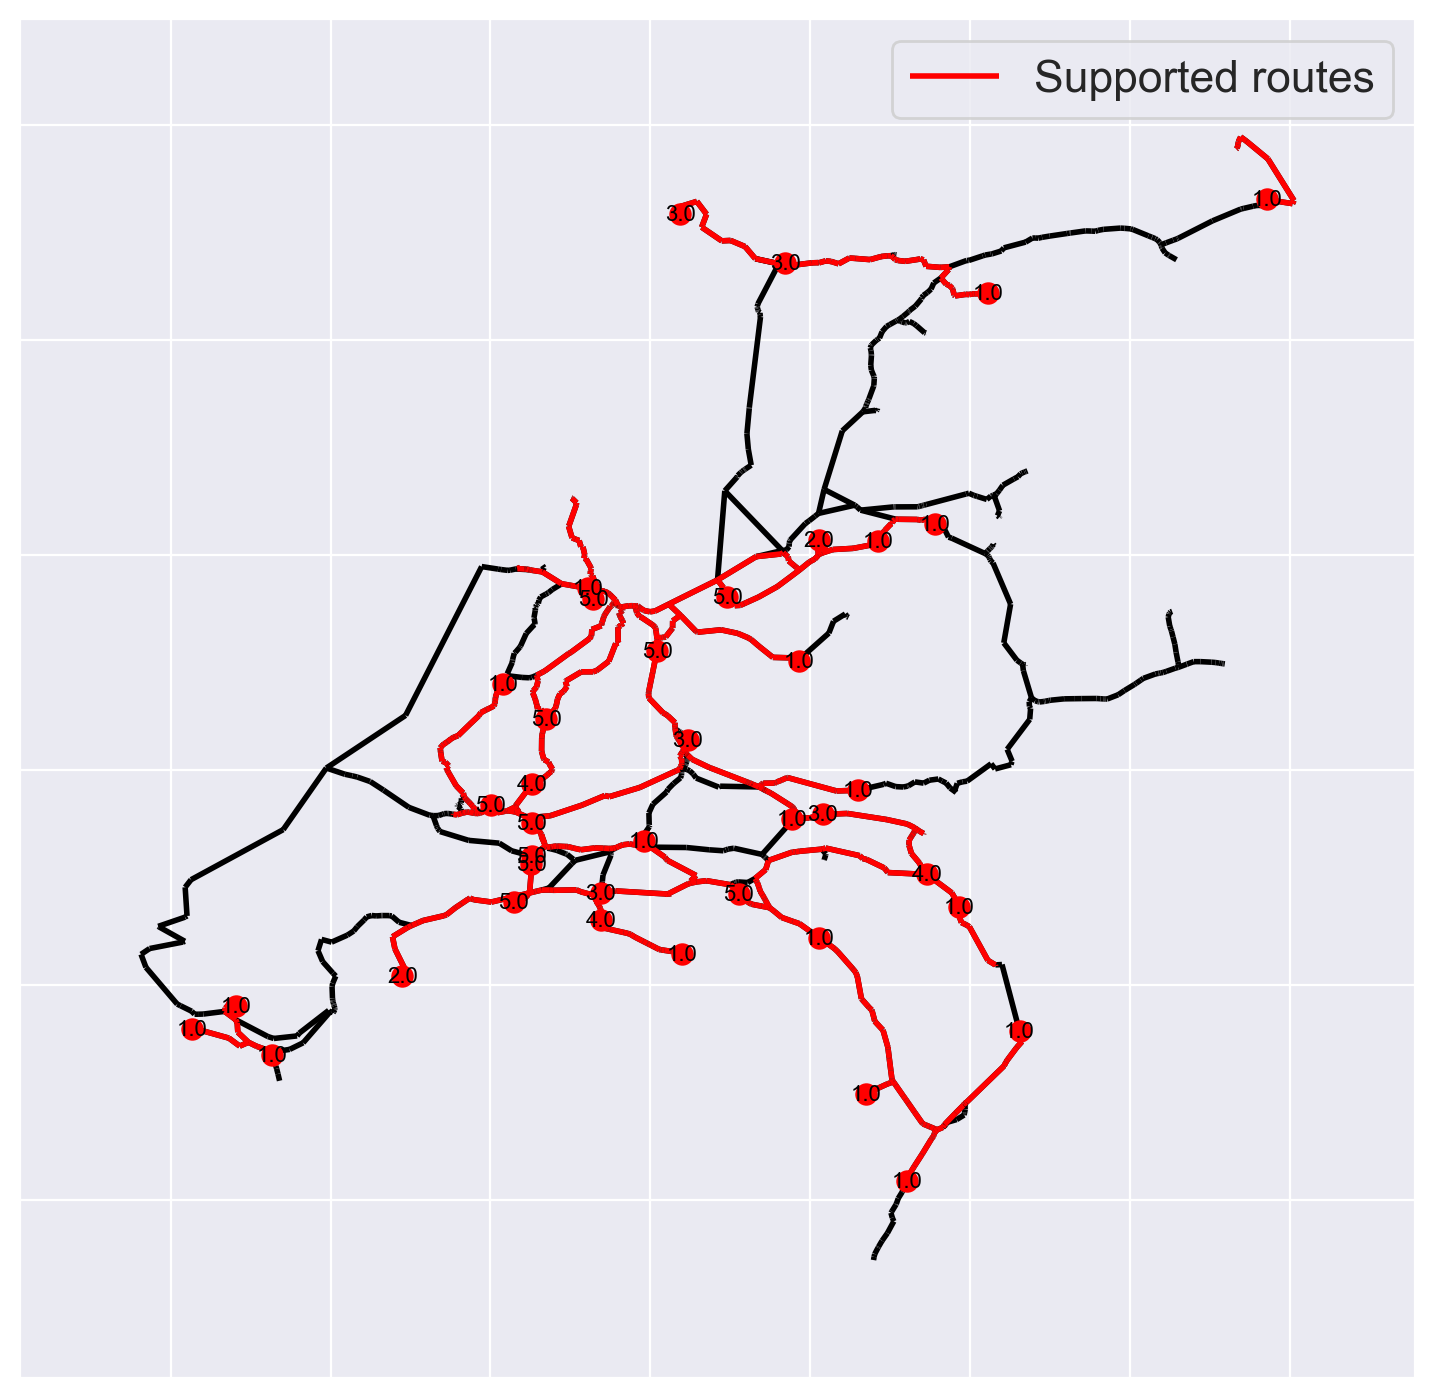

In [8]:
visualize_placement(G, flows, optimal_facilities, non_zero_flows, df_h, paths, unused=False)

## Try to draw using another method

In [12]:
country = ox.geocode_to_gdf('Europe, Netherlands')
# country.set_crs({'init': 'epsg:28992'})
country = ox.project_gdf(country)

NameError: name 'ox' is not defined

In [ ]:
country.crs

In [ ]:
import geopandas as gpd

In [ ]:
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [ ]:
df_links['Coordinates'] = gpd.GeoSeries.from_wkt(df_links['Wkt'])
gdf_links = gpd.GeoDataFrame(df_links,crs='epsg:28992', geometry='Coordinates')

In [ ]:
gdf_nodes = gpd.geopandas.GeoDataFrame(df_nodes, crs='epsg:28992', geometry=gpd.points_from_xy(df_nodes.X, df_nodes.Y))

In [ ]:
import osmnx as ox
# fig, ax= ox.plot_footprints(country, show=False, close=False, color='g', alpha = 0.1)
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)
gdf_links.plot(ax=ax)
gdf_nodes.plot(ax=ax)
plt.show()